# GradCam

## Libraries

In [5]:
import os


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import colorbar

import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

from matplotlib import pyplot
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow.keras.backend as K

#from numpy import expand_dims
#import cv2

## Get trained model

In [6]:
# load the model
model = load_model('best_model.h5')
# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 300, 20)           220       
_________________________________________________________________
activation (Activation)      (None, 300, 20)           0         
_________________________________________________________________
dropout (Dropout)            (None, 300, 20)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 20)           4020      
_________________________________________________________________
activation_1 (Activation)    (None, 300, 20)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 20)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 300, 20)           4

## Make prediction

In [7]:
beat_example = np.asarray([[0.34736387],[0.34710747],[0.34630771],[0.34537855],[0.34479257],[0.34493951],[0.34600323],[0.3478927 ],[0.35024848],[0.35252615],[0.35413674],[0.35460792],[0.3537226 ],[0.35159632],[0.34866995],[0.34561639],[0.34318286],[0.34200813],[0.34246168],[0.344547  ],[0.34789556],[0.35185463],[0.35564822],[0.3585714 ],[0.36016941],[0.36035673],[0.35944616],[0.35808047],[0.35708315],[0.35726432],[0.35922827],[0.36322743],[0.36909591],[0.37627583],[0.38392811],[0.39110032],[0.39691285],[0.40072245],[0.4022296 ],[0.4015101 ],[0.39896884],[0.39522995],[0.39098967],[0.38686426],[0.3832641 ],[0.38031834],[0.37786348],[0.37549634],[0.3726801 ],[0.36888138],[0.36371075],[0.35703722],[0.34905115],[0.34025874],[0.33140435],[0.32333192],[0.31681148],[0.3123674 ],[0.31014877],[0.30987674],[0.31088883],[0.31227835],[0.31310249],[0.31261246],[0.31044792],[0.30674193],[0.30210101],[0.29745602],[0.29381438],[0.29197489],[0.29228237],[0.29449472],[0.29780931],[0.30105273],[0.30299058],[0.30267377],[0.29971967],[0.29443612],[0.28773631],[0.28085218],[0.27491877],[0.27055272],[0.26756666],[0.26493989],[0.26110329],[0.25450858],[0.24435865],[0.23130571],[0.21789823],[0.20859082],[0.20922011],[0.22597769],[0.26404762],[0.32618642],[0.41157535],[0.51525052],[0.62831384],[0.73896759],[0.83423205],[0.9020425 ],[0.93331931],[0.92359044],[0.87382579],[0.7903018 ],[0.68351681],[0.56637718],[0.45202408],[0.35173795],[0.27332648],[0.22028274],[0.19182226],[0.18371426],[0.18965941],[0.20286894],[0.21748818],[0.22957813],[0.23749879],[0.24169319],[0.2440112 ],[0.24680471],[0.25205289],[0.26073625],[0.2725885 ],[0.28624239],[0.29968139],[0.31083892],[0.31816554],[0.32101293],[0.31974867],[0.31559702],[0.31027452],[0.30553661],[0.30276251],[0.30268124],[0.30529239],[0.30997714],[0.31574536],[0.3215353 ],[0.32648006],[0.33007647],[0.33222824],[0.33317455],[0.33334567],[0.33320115],[0.33310143],[0.33324488],[0.33367576],[0.33434486],[0.33518934],[0.3361966 ],[0.33742724],[0.33899008],[0.3409811 ],[0.34341172],[0.34615587],[0.34893907],[0.35137843],[0.35306556],[0.35366991],[0.35303268],[0.35122338],[0.34854134],[0.34545982],[0.34252624],[0.34024352],[0.33896243],[0.33881083],[0.33967574],[0.34124035],[0.34306437],[0.34468696],[0.34572709],[0.34595926],[0.34534955],[0.34404757],[0.34233978],[0.34057753],[0.33909723],[0.33815013],[0.33785543],[0.33818487],[0.33898007],[0.33999782],[0.34097316],[0.34168727],[0.3420261 ],[0.34201726],[0.34183607],[0.34177775],[0.34219894],[0.34343904],[0.3457371 ],[0.34916291],[0.35357966],[0.3586502 ],[0.36388983],[0.36875766],[0.37276845],[0.37559995],[0.3771696 ],[0.37765993],[0.3774832 ],[0.37719024],[0.37734326],[0.37838217],[0.38051771],[0.3836788 ],[0.38752898],[0.39154919],[0.39516663],[0.39789688],[0.39946181],[0.3998518 ],[0.39931485],[0.39827519],[0.39720311],[0.39647201],[0.39624295],[0.39641017],[0.3966249 ],[0.39639304],[0.39522109],[0.39277049],[0.38897637],[0.3840953 ],[0.37866522],[0.37338453],[0.36894014],[0.36582944],[0.36422446],[0.36391642],[0.36435844],[0.36479798],[0.36446639],[0.36277684],[0.35947888],[0.35472842],[0.34905401],[0.34322752],[0.33807288],[0.33426269],[0.33215619],[0.33172053],[0.33255514],[0.33401132],[0.33537349],[0.33605251],[0.33573854],[0.33447253],[0.33261821],[0.33074386],[0.32944819],[0.32917999],[0.33010264],[0.33204214],[0.33453357],[0.33695352],[0.33870107],[0.33937615],[0.33890372],[0.3375668 ],[0.33593618],[0.33471369],[0.33453038],[0.33575516],[0.33836784],[0.34193502],[0.3456997 ],[0.34876538],[0.35032859],[0.34989965],[0.34745243],[0.34346081],[0.33880822],[0.33458946],[0.33185206],[0.33134137],[0.33331341],[0.33746315],[0.34298713],[0.34876555],[0.3536189 ],[0.35657582],[0.35708674],[0.35513229],[0.35120318],[0.34616075],[0.34101762],[0.3366965 ],[0.33382851],[0.33263984],[0.33295007],[0.33427512],[0.33600039],[0.33757234],[0.33865455],[0.33920668],[0.33946846],[0.33985848],[0.34082161]]) 

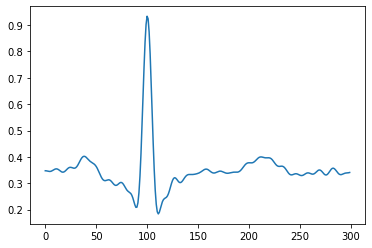

Target Class =  1 corresponding to: [[0.26892602 0.73107404]] Obese is [0., 1.]
The real value is 1


In [8]:
#original code 
#example_index = 6500  #6500, 170 Correspond to obese #13 corresponde to normal
#example = X_ann_data[example_index].reshape((1, X_ann_data.shape[1], 1))
#plt.plot(X_ann_data[example_index])

#code for running standalone 
example = beat_example.reshape((1, 300, 1))
plt.plot(beat_example)
plt.show()

predict = model.predict(example)
target_class = np.argmax(predict[0])
print("Target Class = ", target_class, "corresponding to:", predict, "Obese is [0., 1.]")

#original code
#print("The real value is",y_ann_data_encoded[example_index])

#code for running standalone 
print("The real value is 1")

## Get gradients for the class on the last layer

In [9]:
last_conv = model.get_layer('conv1d_2') #last_conv= model.layers[8]
grad_model = tf.keras.models.Model([model.inputs], [last_conv.output, model.output])

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(example) #get activations maps + predictions from last conv layer
    loss = predictions[:, target_class] # the variable loss gets the probability of belonging to the defined class (the predicted class on the model output)

In [10]:
output = conv_outputs[0] #activations maps from last conv layer
grads = tape.gradient(loss, conv_outputs)[0] #function to obtain gradients from last conv layer

print("grads shape:", grads.shape)
print("Model output (loss for the target class):", loss.shape)
print("Output froom lat conv layer", conv_outputs.shape)

grads shape: (300, 20)
Model output (loss for the target class): (1,)
Output froom lat conv layer (1, 300, 20)


###  Check activation maps on last conv layer 

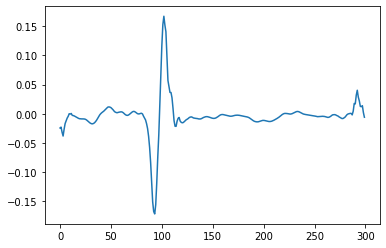

<tf.Tensor: id=21431, shape=(15,), dtype=float32, numpy=
array([-2.4357963e-02, -2.2864079e-02, -3.1673897e-02, -3.8130973e-02,
       -2.6479227e-02, -1.6742539e-02, -1.2119332e-02, -7.4631968e-03,
       -4.3762182e-03,  8.9836540e-05, -6.5328111e-04,  4.8598368e-04,
       -2.7693650e-03, -3.1337638e-03, -3.7832954e-03], dtype=float32)>

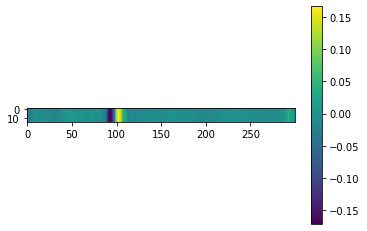

In [11]:
activation_map = output[:,0]
plt.plot(activation_map) 
plt.show() 

Activation_map_image = [activation_map,activation_map,activation_map,activation_map,activation_map,
                        activation_map,activation_map,activation_map,activation_map,activation_map,
                        activation_map,activation_map,activation_map,activation_map,activation_map]
plt.imshow(Activation_map_image) # vmin=-1, vmax=1) #cmap='gray
plt.colorbar()

#c=a.numpy()
#c=a.numpy().reshape(1, -1)

activation_map[0:15]

## Input gradient (importance) on feature maps

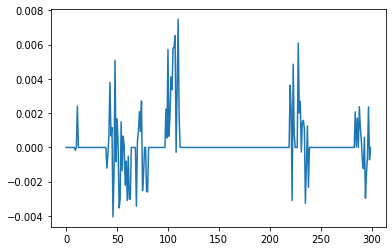

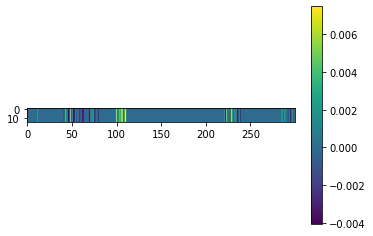

In [12]:
gradient = grads[:,0]

plt.plot(gradient) 
plt.show() 

gradient_map_image = [gradient,gradient,gradient,gradient,gradient,
                        gradient,gradient,gradient,gradient,gradient,
                        gradient,gradient,gradient,gradient,gradient]
plt.imshow(gradient_map_image) # vmin=-1, vmax=1) #cmap='gray
plt.colorbar()

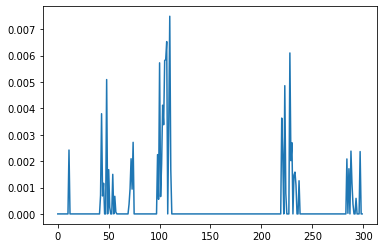

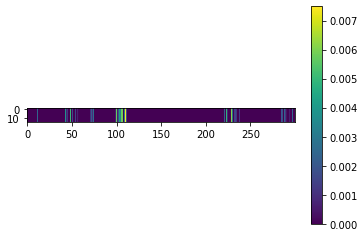

In [13]:
# Apply guided backpropagation
guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

guide_grads_example = guided_grads[:,0]
plt.plot(guide_grads_example) 
plt.show() 

guided_grads_image = [guide_grads_example,guide_grads_example,guide_grads_example, guide_grads_example,guide_grads_example,
                        guide_grads_example,guide_grads_example,guide_grads_example, guide_grads_example,guide_grads_example,
                        guide_grads_example,guide_grads_example,guide_grads_example, guide_grads_example,guide_grads_example]
plt.imshow(guided_grads_image) # vmin=-1, vmax=1) #cmap='gray
plt.colorbar()
#guide_grads_example


In [14]:
# Average guide gradients spatially
weights = tf.reduce_mean(guided_grads, axis=(0))
#print("weights shape", weights.shape) 
print("min", np.min(weights))
print("max", np.max(weights))

#plt.plot(weights) 
#plt.show() 

#Weight of each filter in the conv layer 
weights

min 4.843295e-05
max 0.0010966366


<tf.Tensor: id=57505, shape=(20,), dtype=float32, numpy=
array([3.7568467e-04, 3.4249149e-04, 6.7767949e-04, 6.2643841e-04,
       1.0966366e-03, 5.6399277e-04, 1.0703001e-03, 7.2072208e-04,
       4.8432950e-05, 9.0758147e-04, 8.4446592e-04, 3.1801185e-04,
       4.9542001e-04, 4.2731399e-04, 7.3025713e-04, 2.1227695e-04,
       5.7266228e-04, 8.9018344e-04, 4.1125418e-04, 6.5849331e-04],
      dtype=float32)>

min 0.999223
max 1.001788


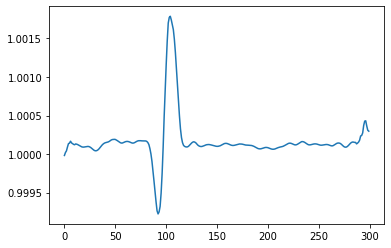

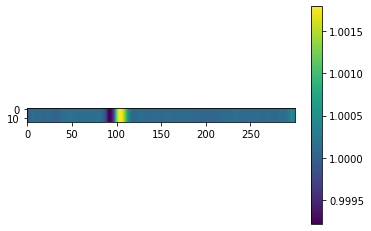

In [15]:
# Build a ponderated map of filters according to gradients importance
cam = np.ones(output.shape[0], dtype = np.float32)
for i, w in enumerate(weights):
    cam += w * output[:, i]
    
print("min", np.min(cam))
print("max", np.max(cam))

plt.plot(cam) 
plt.show() 

cam_image = [cam,cam,cam,cam,cam,
            cam,cam,cam,cam,cam,
             cam,cam,cam,cam,cam]
plt.imshow(cam_image) # vmin=-1, vmax=1) #cmap='gray
plt.colorbar()

## Normalize cam values

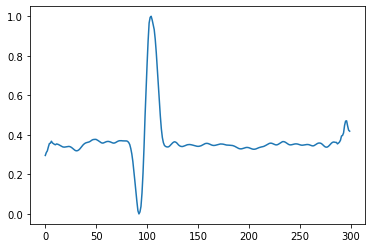

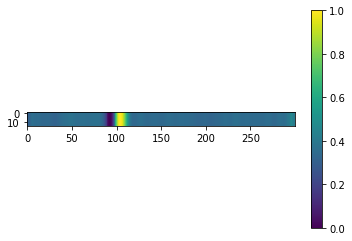

In [16]:
cam = np.maximum(cam, 0)
cam = (cam - cam.min()) / (cam.max() - cam.min())

plt.plot(cam) 
plt.show()

cam_image = [cam,cam,cam,cam,cam,
            cam,cam,cam,cam,cam,
             cam,cam,cam,cam,cam]
plt.imshow(cam_image) 
plt.colorbar()
plt.show()

#cam